# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
%matplotlib inline

In [2]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "traffic-sign-data/train.p"
testing_file = "traffic-sign-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [3]:
### To start off let's do a basic data summary.

# TODO: number of training exampbles
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
# TODO: Preprocess data
# Not going to do any preprocessing for now. Get model working first.

In [ ]:
total_pixels = 32*32
n_classes = 43
# First dimension corresponds to batch size
x = tf.placeholder(tf.float32, shape=[None, total_pixels])
y_ = tf.placeholder(tf.float32, shape=[None, n_classes])

In [ ]:
# Define weights and biases
W = tf.Variable(tf.zeros([total_pixels, n_classes]))
b = tf.Variable(tf.zeros([n_classes]))

# Initialise variables
sess.run(tf.initialize_all_variables())

# Regression model
y = tf.matmul(x, W) + b

# Loss function: Cross-entropy between the target and the softmax 
# activation function applied to the model's prediction
# `tf.nn.softmax_cross_entropy_with_logits` internally applies softmax
# on the model's unnormalised model prediction and sums across all classes
# `tf.reduce_mean` takes average over sums.
## Aside: Cross entropy is "Add up the product of the log to the base e 
## of each computed output times its corresponding target output, and 
## then take the negative of that sum."
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))


In [ ]:
# Apply gradient descent updates to parameters
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# So run model by repeatedly running train_step
for i in range(1000):
    batch = 

In [12]:
X_train[0].shape

(32, 32, 3)

In [13]:
X_train_gray[0].shape

(32, 32)

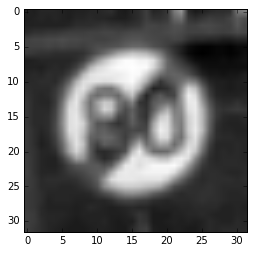

In [14]:
plt.imshow(X_train_gray[0], cmap="gray")

In [15]:
# Parameters
# TODO: Tune parameters
learning_rate = 0.2
training_epochs = 15
batch_size = 100
display_step = 1
dropout = 0.75

In [16]:
# Network Parameters
n_classes = 43


# Multilayer perceptron only
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 3072 # Data input (img shape: 32*32*3)


In [17]:
X_train.shape


(39209, 32, 32, 3)

In [18]:
# tf Graph input
# CHANGE IF SWITCH TO GRAYSCALE OR COLOR
# x_unflattened = tf.placeholder("float", [None, 32, 32])
# Color version:
x_unflattened = tf.placeholder("float", [None, 32, 32, 3])
x = x_unflattened
# x = tf.reshape(x_unflattened, [-1, n_input])
# x = tf.placeholder("float", [None, n_input])

y_rawlabels = tf.placeholder("int32", [None, 1])
y = tf.one_hot(y_rawlabels, depth=43, on_value = 1., off_value = 0., axis=-1)
# y = tf.placeholder("float", [None, n_classes])

In [19]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
"""
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}
"""

"\nweights = {\n    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),\n    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),\n    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))\n}\nbiases = {\n    'b1': tf.Variable(tf.random_normal([n_hidden_1])),\n    'b2': tf.Variable(tf.random_normal([n_hidden_2])),\n    'out': tf.Variable(tf.random_normal([n_classes]))\n}\n"

In [20]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    # strides = [batch, in_height, in_width, channels]
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

In [26]:
# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    # x = tf.reshape(x, shape=[-1, 32, 32, 3])
    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    # CHANGE IF SWITCH TO GRAYSCALE OR COLOR
    'wc1': tf.Variable(tf.random_normal([5, 5, 3, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([4096, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [27]:
# Construct model
pred = conv_net(x, weights, biases, dropout)

ValueError: Shape (?, 32, 32) must have rank 4

In [ ]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [ ]:
# Initializing the variables
init = tf.initialize_all_variables()

In [58]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # Initialise time logs
    init_time = time.time()
    epoch_time = init_time

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        
        # _, c = sess.run([optimizer, cost], feed_dict={x: X_train_flat,
        #                                                  y: y_train})
        
        total_batch = int(n_train/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = np.array(X_train_gray[i*batch_size:(i+1)*batch_size]), np.array(y_train[i*batch_size:(i+1)*batch_size])
            # tf.train.batch([X_train, y_train], batch_size=100, enqueue_many=True)
            # Run optimization op (backprop) and cost op (to get loss value)
            print(batch_y.shape)
            print(batch_x.shape)
            _, c = sess.run([optimizer, cost], feed_dict={x_unflattened: batch_x, y_rawlabels: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
            last_epoch_time = epoch_time
            epoch_time = time.time()
            print("Time since start: ", epoch_time - init_time)
            print("Time since last epoch: ", epoch_time - last_epoch_time)
        # Anneal learning rate
        if epoch % 5 == 0:
            learning_rate = learning_rate * 0.5
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy_train = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy (train):", accuracy.eval({x_unflattened: X_train_gray, y_rawlabels: y_train}))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy (test):", accuracy.eval({x_unflattened: X_test_gray, y_rawlabels: y_test}))

(100,)
(100, 32, 32)


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
Caused by op 'Placeholder_2', defined at:
  File "/Users/jessica/anaconda/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/jessica/anaconda/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-c0c084257a85>", line 2, in <module>
    x_unflattened = tf.placeholder("float", [None, 32, 32, 3])
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 895, in placeholder
    name=name)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1238, in _placeholder
    name=name)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/op_def_library.py", line 704, in apply_op
    op_def=op_def)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2260, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/jessica/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1230, in __init__
    self._traceback = _extract_stack()


Epoch: 0001 cost= 13427247.490975497


In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**
* Unsure as to whether or not to grayscale the data. Colours may be relevant.
* And should I canny?

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

* Training and test data were already separated (downloaded pickled files `train.p` and `test.p`).
* I **shuffled the training data** because they were arranged in ascending order by label. If I don't shuffle the training data, the first series of batches will all be the first type of sign followed by the second type and so on. This will distort the learning process.
* 

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### 1. Multilayer perceptron:
Accuracy: 0.0361045
Epoch: 0001 ??
Epoch: 0002 cost= 815744.508769133
Epoch: 0003 cost= 168490.698397889

Epoch: 0004 cost= 56554.909775724

Epoch: 0005 cost= 26818.548408854

Epoch: 0006 cost= 14889.826330837

Epoch: 0007 cost= 9011.967303315

Epoch: 0008 cost= 5988.394492436

Epoch: 0009 cost= 4126.539816253

Epoch: 0010 cost= 2967.041374024

Epoch: 0011 cost= 2161.320430235

Epoch: 0012 cost= 1508.663957868

Epoch: 0013 cost= 1067.153106089
Epoch: 0014 cost= 793.698785033

Epoch: 0015 cost= 593.311838495

Optimization Finished!
Accuracy: 0.0361045

**Parameters: **
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 3072 # Data input (img shape: 32*32*3)
n_classes = 43
dropout = 0.75

### 2. Shuffled data, CNN ?

**Accuracy: 0.0661124**

Epoch: 0001 cost= 6229650.920280620

Epoch: 0002 cost= 710083.001434949

Epoch: 0003 cost= 266436.397620376

Epoch: 0004 cost= 40370.873389419

Epoch: 0005 cost= 6414.561579786

Epoch: 0006 cost= 2767.111547099

Epoch: 0007 cost= 1589.058798903

Epoch: 0008 cost= 889.909065652

Epoch: 0009 cost= 628.913653361

Epoch: 0010 cost= 403.982779977

Epoch: 0011 cost= 268.866656966

Epoch: 0012 cost= 213.636966043

Epoch: 0013 cost= 164.504478601

Epoch: 0014 cost= 148.535135208


Epoch: 0015 cost= 124.573068128
Optimization Finished!
Accuracy: 0.0661124

### 3. 

**Parameters**
learning_rate = 0.01
training_epochs = 20
batch_size = 100
dropout = 0.75

Epoch: 0001 cost= 4401314.641900507
Time since start:  124.07167100906372
Time since last epoch:  124.07167100906372
Epoch: 0002 cost= 460744.908362564
Time since start:  248.0736701488495
Time since last epoch:  124.00199913978577

Epoch: 0003 cost= 158591.463976802
Time since start:  369.19292306900024
Time since last epoch:  121.11925292015076

Epoch: 0004 cost= 25633.045042077
Time since start:  490.09584307670593
Time since last epoch:  120.90292000770569

Epoch: 0005 cost= 6328.480650051
Time since start:  618.6653850078583
Time since last epoch:  128.56954193115234

Epoch: 0006 cost= 2766.386654555
Time since start:  738.571328163147
Time since last epoch:  119.9059431552887

Epoch: 0007 cost= 1558.966359680
Time since start:  859.5151610374451
Time since last epoch:  120.9438328742981

Epoch: 0008 cost= 848.186354491
Time since start:  982.7473361492157
Time since last epoch:  123.23217511177063

Epoch: 0009 cost= 567.897622487
Time since start:  1103.1300339698792
Time since last epoch:  120.38269782066345

Epoch: 0010 cost= 339.788460373
Time since start:  1224.8287479877472
Time since last epoch:  121.69871401786804

Epoch: 0011 cost= 254.942053559
Time since start:  1345.1813161373138
Time since last epoch:  120.35256814956665
Epoch: 0012 cost= 192.731411504
Time since start:  1461.2258591651917
Time since last epoch:  116.04454302787781
Epoch: 0013 cost= 175.845015737
Time since start:  1575.990646123886
Time since last epoch:  114.76478695869446
Epoch: 0014 cost= 103.022545268
Time since start:  1690.2192060947418
Time since last epoch:  114.22855997085571

Epoch: 0015 cost= 67.658549719
Time since start:  1809.498684167862
Time since last epoch:  119.27947807312012
Epoch: 0016 cost= 80.118465821
Time since start:  1938.3230130672455
Time since last epoch:  128.82432889938354

Epoch: 0017 cost= 87.660711400
Time since start:  2063.3035790920258
Time since last epoch:  124.98056602478027
Epoch: 0018 cost= 70.692811768
Time since start:  2183.8509731292725
Time since last epoch:  120.5473940372467
Epoch: 0019 cost= 45.872161668
Time since start:  2301.7605440616608
Time since last epoch:  117.9095709323883

Epoch: 0020 cost= 88.139990640
Time since start:  2419.7678561210632
Time since last epoch:  118.00731205940247

### 4.
learning_rate = 0.05
training_epochs = 15
batch_size = 100
display_step = 1
dropout = 0.75

**Accuracy (train): 0.0651636
Accuracy (test): 0.0643705**

Epoch: 0001 cost= 5909136.460778054
Time since start:  115.89085698127747
Time since last epoch:  115.89085698127747
Epoch: 0002 cost= 693703.706313775
Time since start:  225.34309005737305
Time since last epoch:  109.45223307609558
Epoch: 0003 cost= 203160.844303053
Time since start:  337.0173840522766
Time since last epoch:  111.67429399490356
Epoch: 0004 cost= 26818.438195053
Time since start:  450.9942510128021
Time since last epoch:  113.97686696052551
Epoch: 0005 cost= 7291.215316393
Time since start:  562.2442078590393
Time since last epoch:  111.24995684623718
Epoch: 0006 cost= 3280.408033450
Time since start:  679.1656539440155
Time since last epoch:  116.9214460849762
Epoch: 0007 cost= 1713.457381888
Time since start:  799.2612409591675
Time since last epoch:  120.09558701515198
Epoch: 0008 cost= 1052.008079729
Time since start:  916.8416850566864
Time since last epoch:  117.58044409751892

Epoch: 0009 cost= 670.235100511
Time since start:  1033.9041900634766
Time since last epoch:  117.06250500679016
Epoch: 0010 cost= 401.787747197
Time since start:  1150.802397966385
Time since last epoch:  116.89820790290833

Epoch: 0011 cost= 302.940664791
Time since start:  1268.934802055359
Time since last epoch:  118.132404088974
Epoch: 0012 cost= 163.801125215
Time since start:  1391.1006109714508
Time since last epoch:  122.16580891609192
Epoch: 0013 cost= 181.586838395
Time since start:  1589.9181010723114
Time since last epoch:  198.8174901008606
Epoch: 0014 cost= 141.005967359
Time since start:  1776.7068350315094
Time since last epoch:  186.788733959198

Epoch: 0015 cost= 88.685234695
Time since start:  1897.3108160495758
Time since last epoch:  120.6039810180664
Optimization Finished!
Accuracy (train): 0.0651636
Accuracy (test): 0.0643705

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.